# ROUGH DRAFT

# Project 1: Cal EnviroScreen

**Developers**: Bing Concepcion, James Geronimo, Zcjanin Ollesca

---

In this project, students will gain experience with fundamental Exploratory Data Analysis? using the CalEnviroScreen data. This project will build on methods introduced in lab. It will also serve as an application of data science in the field of social sciences and **environmental justice**. According to state law, environmental justice refers to the "fair treatment of people of all races, cultures, and incomes with respect to the development, adoption, implementation and enforcement of environmental laws, regulations, and policies." 

By the end of this project, students will be able to:
- Perform basic tabular analysis using pandas and interpret results
- Extract data using conditional selection
- Visualize and analyze CalEnviroScreen data
- Identify how data-driven decision making can guide policy and resource allocation

## Table of Contents

1. [Introduction](#1.-introduction)
2. [Exploratory Data Analysis](#exploratory-data-analysis)
3. [Visualizing the Data](#visualizing-the-data)
4. [Data-Driven Decision Making](#data-driven-decision-making)

### Import Modules

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import seaborn as sns
pd.set_option("display.max_columns", None)

---

## 1. Introduction


The [California Communities Environmental Health Screening Tool](https://oehha.ca.gov/calenviroscreen) (CalEnviroScreen) provides accessible demographic and environmental information to identify communities that are susceptible to certain types of pollution. This tool utilizes environmental, health, and socioeconomic information to produce scores for every census tract in California, allowing us to compare qualities of different communities. 

### 1.1 Reading in CalEnviroScreen Data

To begin exploring CalEnviroScreen, run the following cell to read in the data.

In [6]:
# Read in the data
ces = pd.read_csv('cal_enviro_screen.csv')
ces.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


Before we begin any tabular analysis, let's familiarize ourselves with this DataFrame by looking at its dimensions and the data types of its columns. Run the following code cell to print the dimensions of `ces`.

### The Granularity of our Data

**Granularity** refers to the *level of detail* captured within a dataset. It defines the **smallest unit of observation**, or  *how* specific the data points are. 

* A dataset with *high granularity* contains fine-grained, detailed records such as individual transactions and sensor readings.
* A dataset with *low granularity* consists of more aggregated information such as monthly sales summaries and regional statistics.

Each row in the dataset represents a single census tract in California. We can think of a census tract as a small, relatively permanent statistical subdivision of a county, defined by the [U.S. Census Bureau](https://www.census.gov/).

The data we have available to us provides environmental and demographic data at this census tract level, including pollution burden indicators (e.g., air quality, hazardous waste sites), as well as some population characteristics (e.g., asthma rates, linguistic isolation, poverty levels). 

In total, California has around 8,057 census tracts. Let's examine how many we have in our dataset: 

In [7]:
# Run this cell
cal_enviro_screen_shape = ces.shape
num_rows = cal_enviro_screen_shape[0]
num_columns = cal_enviro_screen_shape[1]

print(f"Our version of the CalEnviroScreen data has {num_rows} rows and {num_columns} columns")

Our version of the CalEnviroScreen data has 8035 rows and 58 columns


Let's take a look and see if all these rows are unique census tracts: 

In [8]:
number_unique = ces["Census Tract"].nunique()
print(f"There are {number_unique} census tracts in our dataset!")

There are 8035 census tracts in our dataset!


Great! Our dataset contains 8,305 unique census tracts, matching the total number of rows. This confirms that there are no duplicate entries

**Question 1.1.**: Relative to county or state-level data, how would you describe the granularity of the CalEnviroScreen dataset? Assign `relative_granularity` to an integer corresponding to the assumption.

1. Lower granularity, because it aggregates data across multiple regions.
2. Higher granularity, because it provides more detailed, localized data.
3. The same level of granularity as county and state-level data.
4. Granularity cannot be determined without individual-level data.

In [9]:
relative_granularity = ...

### Properties of Our Data

Now, let's take a look at some of the columns of our DataFrame. We can do so using the `.columns` attribute of DataFrame objects:

In [10]:
# Run this cell
print(ces.columns)

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       'CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone', 'Ozone Pctl',
       'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Lead', 'Lead Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl',

## Expository for the columns

Let's also examine the data types of some of our columns

In [11]:
# Run this cell to return the data type of the first 10 columns of the DataFrame
ces.dtypes[:10]

Census Tract                  int64
Total Population              int64
California County            object
ZIP                           int64
Approximate Location         object
Longitude                   float64
Latitude                    float64
CES 4.0 Score               float64
CES 4.0 Percentile          float64
CES 4.0 Percentile Range     object
dtype: object

### Indicators

The Cal Enviroscreen [Indicators Overview](https://oehha.ca.gov/calenviroscreen/indicators-overview) defines an indicator as a measure of environmental and population characteristics, which can then be used to assess the vulnerability of pollution for a specific country. These are grouped into four categories:

* Exposure Indicators – Measure pollution levels that people may come into contact with.
* Environmental Effects Indicators – Identify toxic chemical sites near communities.
* Sensitive Population Indicators – Reflect health conditions or age factors that make individuals more vulnerable to pollution.
* Socioeconomic Factor Indicators – Represent social and economic conditions that can increase stress and make communities more susceptible to pollution’s effects.

Each indicator is scored separately, contributing to the overall CalEnviroScreen score.

**Question 1.2.** Select *one* specific indicator from each group and provide a brief description of what it represents, what it measures, and what it's purpose is.  

For a full list of these indicators, visit the CalEnviroScreen [Indicators Overview](https://oehha.ca.gov/calenviroscreen/indicators-overview) and scroll to the bottom of the page.

##### a) Exposure Indicator

*Write your answer here*

##### b) Environmental Effects Indicator

*Write your answer here*

##### c) Sensitive Population Indicator

*Write your answer here*

##### d) Socioeconomic Factor Indicator

*Write your answer here*

## Not sure if we should keep this: 

---

### 2. Reading in Community College Data

Let's also read in data containing information about the locations of community colleges in California. We will familiarize ourselves with this data the same way we did for `ces`.

In [12]:
# Read in the data
colleges = pd.read_excel("colleges.xlsx")
colleges.head()

,OPEID,College,City,State,Zip,yrs,EVDCode
0,111100,ALLAN HANCOCK COLLEGE,SANTA MARIA,CA,93454,2,1
1,111300,ANTELOPE VALLEY COLLEGE,LANCASTER,CA,93534,2,1
2,111500,ARMSTRONG UNIVERSITY,BERKELEY,CA,94704,4,4
3,111600,ART CENTER COLLEGE OF DES,PASADENA,CA,91103,4,4
4,111700,AZUSA PACIFIC UNIVERSITY,AZUSA,CA,91702,4,4


**Question 2.1.** What is the granularity of the `colleges` dataset? What does each row represent? 

*YOUR ANSWER HERE...*

**Question 2.2.** What are the dimensions of the `colleges` dataset? Fill in the code cell with the necessary code and print your answer.

Hint: We did this in a previous cell! 

In [13]:
# TODO: Fill in the ellipses

community_college_shape = ...
cc_num_rows = ...
cc_num_columns = ...

print(f"The Community College dataset has {cc_num_rows} rows and {cc_num_columns} columns")

The Community College dataset has Ellipsis rows and Ellipsis columns


**Question 2.3.** What are the columns of the dataset? List them all below

In [14]:
# TODO: Write code to print the columns of the enviro dataset

print(...)

Ellipsis


### 1.3 Merging `ces` and `colleges`

Now that we have an understanding of both of our DataFrames, we will merge these two DataFrames to analyze the socioeconomic conditions of various community colleges in California. We can make use of the [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function in pandas for this. 

To use `pd.merge()`, we will pass in the following parameters into the function respectively:
- The first DataFrame being merged
- The second DataFrame being merged
- **how** indicates the type of merge to be used
- **left_on** and **right_on** parameters are assigned to the string names of the columns to be used when performing the join. These two on parameters tell pandas what values should act as pairing keys to determine which rows to merge across the DataFrames. We’ll talk more about this idea of a pairing key next lecture.

We will be using an *inner* merge which will use the intersection of keys from both DataFrames( similar to a SQL inner join). It will preserve the order of the left keys.

We will merge via the 

In [15]:
# Merge enviro and collegecodes

filtered_colleges = colleges[colleges['EVDCode'] != 4]
ces_cc = pd.merge(ces, filtered_colleges, how='inner', left_on='ZIP', right_on='Zip')
ces_cc.shape

(690, 65)

Notice that after joining both of our DataFrames, we are only left with 208 rows. It is important to keep track of the characteristics of our data as we perform manipulations. 

---

## 2. Exploratory Data Analysis

In this next section, we will focus on tabular analysis of the DataFrames that we have constructed. Specifically we will practice utility functions, slicing, conditional selection, and aggregations.

### 2.1 Utility Functions

The attribute, `CES 4.0 Score`, reveals the CalEnviroScreen Score for a given census tract.  Essentially, this score takes into account the `Pollution Burden`, which accounts for factors like air and water quality, and `Population Characteristics`, which assesses the sensitivity of the population to pollution, to measure the socioeconomic conditions across various communities. Higher scores indicate greater cumulative environmental and health burdens. This score aids state agencies, local governments, and community organizations identify communities that are more susceptible to environmental health concerns.

Let's find the most polluted census tracts and show which colleges are impacted.

**Question 2.1.1** Write code to find the top 10 most polluted census tracts and display the colleges using the `CES 4.0 Score` column and the `.sort_values()` function in pandas. Assign it to the variable `most_polluted`. 

If you are feeling stuck, consult the pandas documentation for the function to understand how to use it. Be sure to display the results in *ascending* order

In [16]:
# TODO: Write code to find the most polluted census tracts and display the colleges

most_polluted = ...
most_polluted

Ellipsis

In [17]:
# SOLUTION

most_polluted = ces.sort_values(by='CES 4.0 Score', ascending=False).head(10)
most_polluted

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95
5,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,95-100% (highest scores),...,NaN,43.5,74.05,9.3,83.22,23.7,76.35,83.37,8.65,95.46
6,6019001000,4255,Fresno,93706,Fresno,-119.804314,36.697751,80.55,99.92,95-100% (highest scores),...,88.70,79.5,99.41,15.4,97.14,33.3,94.83,95.84,9.94,99.99
7,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.29,99.91,95-100% (highest scores),...,60.62,56.8,88.92,12.6,93.49,29.6,89.84,85.44,8.86,96.90
8,6019001202,4561,Fresno,93725,Unincorporated Fresno County area,-119.741028,36.702685,79.17,99.90,95-100% (highest scores),...,89.62,72.2,98.12,16.3,97.90,30.8,91.76,87.24,9.05,98.05
9,6077000100,3688,San Joaquin,95202,Stockton,-121.285363,37.953996,77.87,99.89,95-100% (highest scores),...,91.39,78.8,99.31,14.6,96.46,33.1,94.64,95.83,9.94,99.97


### A special case: PM2.5

Produced from vehicle emissions, industrial pollution, and wildfires, PM2.5 (Particulate Matter (PM) that is 2.5 micrometers or smaller in diameter) is one of the most dangerous air pollutants. Their tiny size allows them to penetrate deep into the lungs and even enter the bloodstream. Exposure to PM2.5 is linked to respiratory diseases (like asthma and bronchitis), as well as cardiovascular diseases. 

We typically measured PM2.5 in micrograms per cubic meter (µg/m³) of air. Below is a table showing the potential risks of different `PM2.5` values

|PM2.5 (µg/m³) | Air Quality Index (AQI) | Health Concern|
|---------------|------------------------|---------------|
|0 – 12	|          Good	                |Minimal impact
|12 – 35.4 |	Moderate |	Unhealthy for sensitive groups|
|35.5 – 55.4	|Unhealthy	|Risk for everyone|
|55.5 – 150	|Very Unhealthy|	Health warning issued|
|150+|	Hazardous|	Emergency conditions|


**Question 2.1.2:** Sort the dataset by `PM2.5` concentration (in descending order) and assign the resulting `DataFrame` to the variable `sorted_PM2_5`.

*Hint: You may find the `ascending=` parameter of the `.sort_values()` function useful*

In [22]:
# TODO: 

sorted_PM2_5 = ...
sorted_PM2_5

Ellipsis

In [34]:
# SOLUTION

sorted_PM2_5 = ces.sort_values(by='PM2.5', ascending=False)
sorted_PM2_5.head(3)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Lead,Lead Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
37,6029002500,9052,Kern,93307,Bakersfield,-118.992028,35.337254,73.36,99.53,95-100% (highest scores),0.066,95.27,16.394748,100.00,0.091,34.24,753.64,85.68,76.95,86.49,2.14,48.14,40.296399,16.62,649.831890,32.13,40.4,93.49,43.75,87.75,4.625,97.56,0,0.0,8.6,87.81,65.99,8.06,96.53,82.69,86.86,6.17,78.56,22.78,94.92,39.9,89.86,18.6,84.54,65.3,95.18,24.4,99.71,23.1,74.52,87.77,9.10,98.31
733,6029003103,4084,Kern,93307,Rexland Acres,-118.994527,35.309566,52.83,90.76,90-95%,0.066,95.27,16.376904,99.99,0.113,41.17,636.20,71.21,75.76,85.42,2.54,49.24,71.868898,20.72,298.814141,8.21,0.4,5.64,6.50,36.16,0.100,16.64,0,0.0,7.4,84.17,48.78,5.96,67.27,84.72,87.56,6.02,75.56,23.51,95.99,42.2,91.53,22.2,89.29,68.5,96.81,15.5,97.20,16.9,48.52,85.52,8.87,97.00
1737,6029003121,8339,Kern,93307,Bakersfield,-119.012127,35.317668,42.03,78.10,75-80%,0.066,95.27,16.355359,99.98,0.057,20.61,625.12,70.31,60.02,65.78,0.00,0.00,51.142934,18.20,506.587363,21.36,0.0,0.00,5.50,32.38,0.175,30.17,0,0.0,2.5,59.18,40.74,4.97,45.04,79.48,84.72,7.74,95.32,19.21,84.93,32.8,83.27,8.9,57.41,62.1,93.04,12.9,94.09,16.2,45.03,81.45,8.45,93.94


**Question 2.1.3:** Now that we have sorted the `ces` DataFrame by the values in the `PM2.5`, let's now go about **accessing** the highest value! Assign `highest_PM2_5` to the highest `PM2.5` concentration by using the `sorted_PM2_5` Dataframe

Make sure you use Pandas code to do this! Don't assign `highest_PM2_5` to just the highest value. 

In [23]:
# TODO:

highest_PM2_5 = ...
highest_PM2_5

Ellipsis

In [42]:
# SOLUTION

highest_PM2_5 = sorted_PM2_5["PM2.5"].iloc[0]
highest_PM2_5

np.float64(16.39474779)

**Question 2.1.4:** What *Approximate Location* and *county* does this `highest_PM2_5` value come from? Assign these values to `approx_loc_PM2_5` and `county_PM2_5` respectively

In [ ]:
# TODO

approx_loc_PM2_5 = ...
county_PM2_5 = ...

In [41]:
# SOLUTION

approx_loc_PM2_5 = sorted_PM2_5["Approximate Location"].iloc[0]
county_PM2_5 = sorted_PM2_5["California County"].iloc[0]

approx_loc_PM2_5, county_PM2_5

('Bakersfield', 'Kern ')

**Question 2.1.5:** Based on your answers above, how would you classify the AQI for this Approximate Location? Furthermore, provide 1 reason why you think the `PM2.5` value is as high as it is for this location.

*type your answer here* 

--- 

## Question Ideas: 
 we wouldnt do all of these, just some for more exploration and to get use with some of the pandas methods. Motivation has to be high with these, like say "oh, suppose we are interested in looking at this, pretend you're managing resources and want to find out this - " 

* Find the difference between the lowest CES 4.0 Score and the Highest CES 4.0 Score
* What Approximate location has the highest population in California?


**Question 2.1.3:** Take a look at the difference in cities between the most polluted and least polluted census tracts. What do you notice? Are there any characteristics that cities in the most polluted census tracts have in common? What about in the least polluted census tracts? Write 2-3 sentences noting your observations. 

*YOUR ANSWER HERE...*

### 2.2 Filtering and Conditional Selection

Let's take a closer look at the census tract for El Camino College. The relevant tract number is **6037603702**. We will be using filtering methods you have learned in lab to find information on El Camino College.

**Question 2.2.1:** Filter the dataset using `.loc()` for this tract number and save the DataFrame by assigning it to the variable `ecc` using the code cell below.

In [ ]:
# TODO: Fill in the ellipses

ecc = ces[...]
ecc

**Question 2.2.2:** Based on this filtered data, let's examine three new measures of environmental health and interpret the scores for El Camino College. Before writing any code let's establish what these measures are. Refer back to the CalEnviroScreen website for context on these three health measures in the data and write definitions for each. 

- `PM2.5 Pctl`: *YOUR ANSWER HERE...*
- `asthma_pctl`: *YOUR ANSWER HERE...*
- `CES 4.0 Percentile`: *YOUR ANSWER HERE...*

Now, write code in the cell below to obtain the values for these metrics, as well as `Pollution Burden Pctl`, for the **El Camino College** census tract. Please use **boolean conditioning** to filter the DataFrame. 

Remember that boolean conditioning utilizes brackets to filter a DataFrame. Refer to the example below which filteres the `babynames` DataFrame to contain only female babies:

`ex: babynames[babynames["Sex"] == "F"]`

In [19]:
# TODO: Fill in the ellipses

pm25_pctl = ...
asthma_pctl = ...
ces4_pctl = ...
plltn_burden_pctl = ...

Briefly describe the real-world implications of at least two of these scores.

*YOUR ANSWER HERE...*

Let's compare these four measures across other census tracts in **Los Angeles**. 

**Question 2.2.3:** Write code to filter the enviro_cc dataset to contain only Los Angeles county data by using the `City` column. Additionally, make sure only the following columns are included in this new dataset: `Approximate Location`, `PM2.5 Pctl`, ` CES 4.0 Percentile`, `Asthma Pctl`, and `Pollution Burden Pctl`. You can use any form of conditional selection for this question (.loc(), boolean conditioning).

In [ ]:
# TODO: Filter for Los Angeles data

la = ...
la.head()

### 2.3 Groupby

Finally, we are going to use a popular aggregation method you have used in lab, `.groupby()`. As data scientists, we often wish to investigate trends across a larger subset of our data. For example, we may want to compute some summary statistic (the mean, median, sum, etc.) for a group of rows in our DataFrame.  Our goal is to group together rows that fall under the same category and perform an operation that aggregates across all rows in the category. Before you jump into aggregating the data, follow along with the example below for a refresher on the `.groupby()` method.

**Demo:** In this example, our goal will be to create a DataFrame that finds the mean `CES 4.0` score by unique `California County`. This demo is adapted from the [Data 100 Textbook](https://ds100.org/course-notes/pandas_3/pandas_3.html#aggregating-data-with-.groupby).

The first step to achieve this goal is to call `.groupby()` on the `ces_cc` DataFrame and passing in the necessary column. In this specific case, we want to make groups according to each unique county so we will pass in `California County`. 

In [21]:
# DEMO: Step 1

ces_cc.groupby('California County')

Calling .groupby() alone will not return a viable DataFrame. This returns a GroupBy object, which you can imagine as a set of “mini” sub-DataFrames, where each subframe contains all of the rows from `ces_cc` that correspond to a particular county. To actually manipulate values within these “mini” DataFrames, we’ll need to call an *aggregation* method. This is a method that tells pandas how to aggregate the values within the GroupBy object. Once the aggregation is applied, pandas will return a normal (now grouped) DataFrame.

One way to call an aggregation method is to call `.agg()` on your GroupBy object. You must specifiy the aggregation function you want to use by passing it into the method call as a numpy function (np.mean, np.sum) or as a string ('mean', 'median', 'size'). In our case, we want to find the mean within each county. 

There are many other aggregation functions we can use:
- .agg("sum")
- .agg("max")
- .agg("min")
- .agg("mean")
- .agg("first")
- .agg("last")

For more information, refer to the `.groupby()` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [ ]:
# DEMO: Step 2

ces_cc.groupby('California County').agg('mean')

As you can see, our index now becomes the unique county names in the DataFrame and each value is the mean value for that column attribute in each county. We only want to look at the mean `CES 4.0 SCORE` score by county so we will use **double bracket notation** to filter the DataFrame for only this column. While we can perform this step after calling .agg(), we can also perform it after calling .groupby() to avoid applying the aggregation function on *all* columns of the data. This is good practice when you know which columns you want summary statistics for.

In [23]:
# DEMO: Step 3

ces_cc.groupby('California County')[['CES 4.0 Score']].agg('mean')

,CES 4.0 Score
California County,
Alameda,33.640000
Contra Costa,29.067647
Fresno,48.456000
Humboldt,26.784286
Imperial,40.510000
Kern,44.443000
Lassen,20.242500
Los Angeles,40.205685
Marin,7.253333


Now we have a new DataFrame that contains information about the mean CES 4.0 score by county!

*Bonus Step:* If we want to look at the counties with the highest scores, We can also sort this data by using `.sort_values()`.

In [24]:
# DEMO: Step 4 (optional)

ces_cc.groupby('California County')[['CES 4.0 Score']].agg('mean').sort_values('CES 4.0 Score', ascending=False)

,CES 4.0 Score
California County,
Fresno,48.456000
Kern,44.443000
Merced,43.780000
Stanislaus,41.587500
Imperial,40.510000
Los Angeles,40.205685
Tulare,39.618182
San Joaquin,37.725000
San Bernardino,36.318571


Now you are ready to try out the `groupby()` function in the next question!

**Question 2.3.1:** With the `la` DataFrame, find the mean value for each of these four metrics (`CES 4.0 Score`, `PM2.5`, `Asthma`, and `Pollution Burden Score`) based on the unique `City`. Assign this new dataset to a new DataFrame. 

In [25]:
# TODO: Write code to find the mean of PM2.5, CES4.0, Asthma, and Pollution Burden percentiles by city

city_means = ...

Instead of the mean, return the median value for each of the same four metrics based on the unique city.

In [26]:
# TODO: Write code to find the median of PM2.5, CES4.0, Asthma, and Pollution Burden percentiles by city

city_medians = ...

---

## 3. Visualizing the Data

In conducting exploratory data analysis, we often perform **tabular analysis** (as we did in the previous section) for organizing and summarizing the data. However, tabular analysis may fall short in the ability to capture complex trends, patterns, or relationships within the data. This is especially true when dealing with large datasets where patterns may be more difficult to interpret by solely examining the rows of a DataFrame. **Data visualizations** address these limitations by transforming tabular data into intuitive visual displays that leverage human perception to identify patterns and trends. 

This portion of the notebook will motivate the importance of visualizations with the use of standard plotting libraries like [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/stable/). 

### 3.1 Histograms

For the purpose of visualization, will be focusing on eight column attributes from the `ces_cc` DataFrame. Run the code cell below to save the subset as a new DataFrame

In [27]:
# Run this code cell

ces_subset = ces_cc[['CES 4.0 Score', 'PM2.5', 'Asthma', 'Pollution Burden Score', 'Low Birth Weight', 'Education','Poverty', 'Housing Burden']]

Let's take a look at the **distributions** of some of the columns in `ces_subset` to get a better sense of the data. Rememeber that a distribution describes both the set of values that a single variable can take and the frequency of unique values in a single variable. To do so, we will plot a histogram using seaborn's [`.histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to observe the distribution of `CES 4.0 Score` across census tracts. Run the code cell below to familiarize yourself with the syntax of the function. Here, we pass an additional parameter, `stat='density'`, to visualize the distribution in terms of density rather than frequency. 

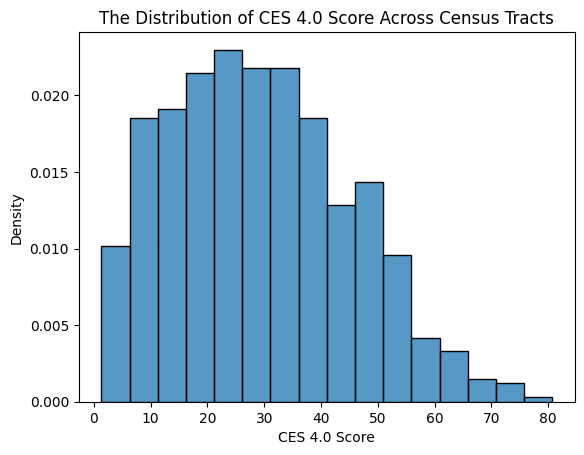

In [28]:
sns.histplot(ces_subset, x='CES 4.0 Score', stat='density')
plt.title('The Distribution of CES 4.0 Score Across Census Tracts');

**Question 3.1.1:** Write 1-2 sentences describing the distribution of `CES 4.0 score` based on the histogram above.

*YOUR ANSWER HERE...*

**Question 3.1.1:** Plot a histogram showing the distribution of `Asthma` across census tracts using `ces_set`. Be sure to include a title for your plot. 

In [29]:
# TODO: Write code to plot a histogram of Asthma using seaborn

... 

Ellipsis

Describe the distribution in 1-2 sentences.

*YOUR ANSWER HERE...*

### 3.2 Violin Plots

What if we went to compare the distributions of multiple attributes at once? We can use a **violin plot** which shows the distribution of data points after grouping by one (or more) variables. To create a violin plot, we will use seaborn's `.violinplot()` function. For more information, refer to the function [documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

In [30]:
# Run this code cell

cities = ['Los Angeles', 'San Bernardino', 'East Los Angeles', 'Compton']
ces_cities = ces[['Approximate Location', 'CES 4.0 Score', 'PM2.5', 'Asthma', 'Pollution Burden Score', 'Low Birth Weight', 'Education','Poverty', 'Housing Burden']]
ces_cities = ces_cities[ces_cities['Approximate Location'].isin(cities)]

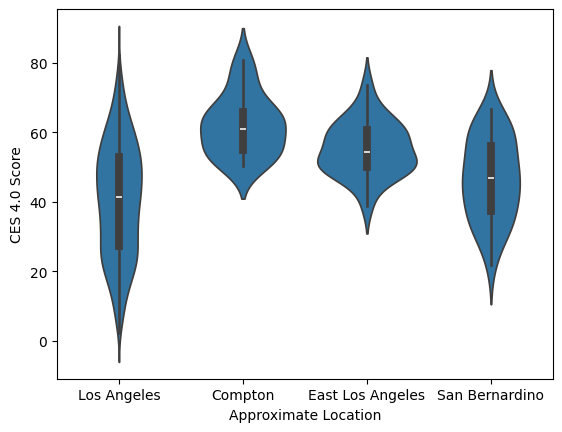

In [31]:
sns.violinplot(ces_cities, x='Approximate Location', y='CES 4.0 Score');

**Question 3.2.1:** Write down 2-3 observations based on the violinplot above.

*YOUR ANSWER HERE...*

### 3.3 Correlations

For the final part of the visualization section, we will briefly discuss how visualizations can help our understanding of relationships between column attributes in our data. 

First, we will begin with pairplots in seaborn. Pairplots allow us to visualize pairwise relationships of column attributes in our data. To create a pairplot, we will call [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) and pass in a DataFrame. This will create an $n x n$ grid of plots where n is the number of columns in our data. The histograms along the diagonal of a pairplot describe the distributions of each column attribute. The remaining scatterplots depict the relationship between two columns in the data. Run the following code cell to generate a pairplot. 

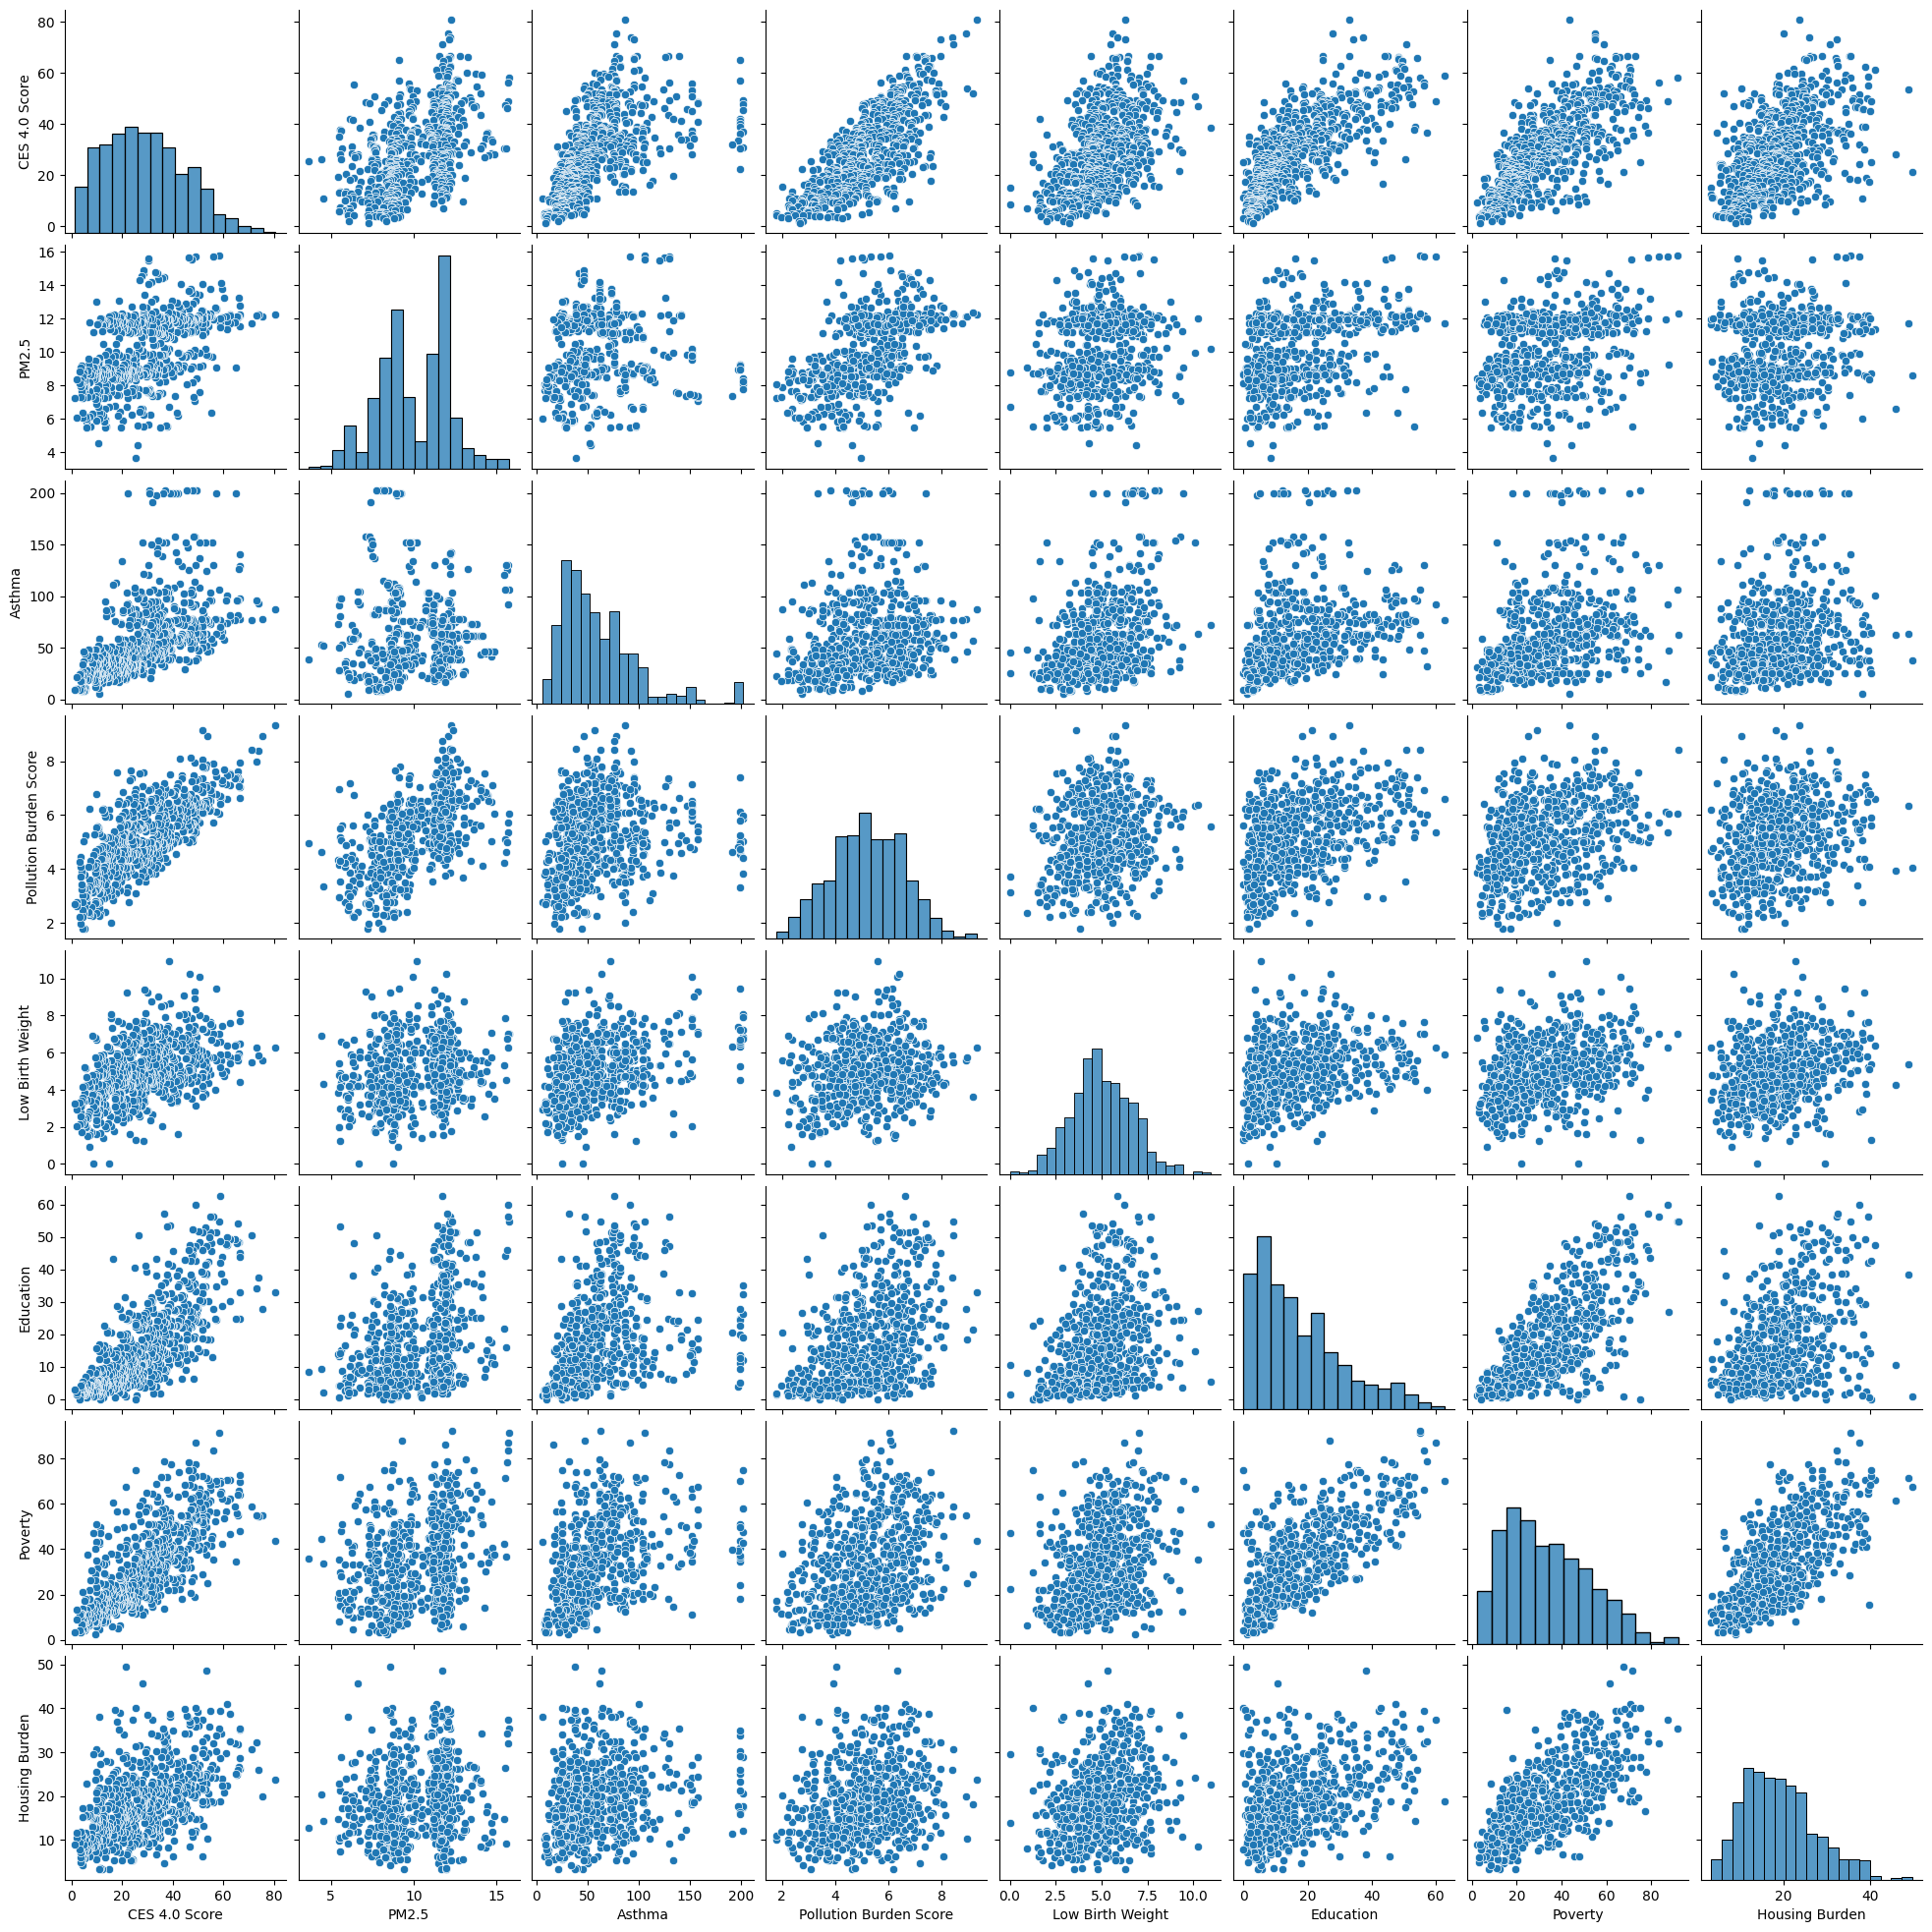

In [32]:
sns.pairplot(ces_subset);

**Question 3.3.1:** From this plot we can see that `Poverty` and `Housing Burden` seem to have a positive, linear relationship which is indicated the scatter of points that fall along a line with a positive slope. What other relationships do you see in the pairplot?

*YOUR ANSWER HERE...*

We can also draw some simple, but powerful analyses by observing the correlation between variables in our data. The code cell below computes the correlation coefficient between various socioeconomic variables in our data and plots a **heatmap** of these coefficients. A heatmap is a visualization that represents the magnitude of values using color. It allows us to easily observe the magnitudes of correlation across pairs of variables.

Run the code cell below and interpret the heatmap.

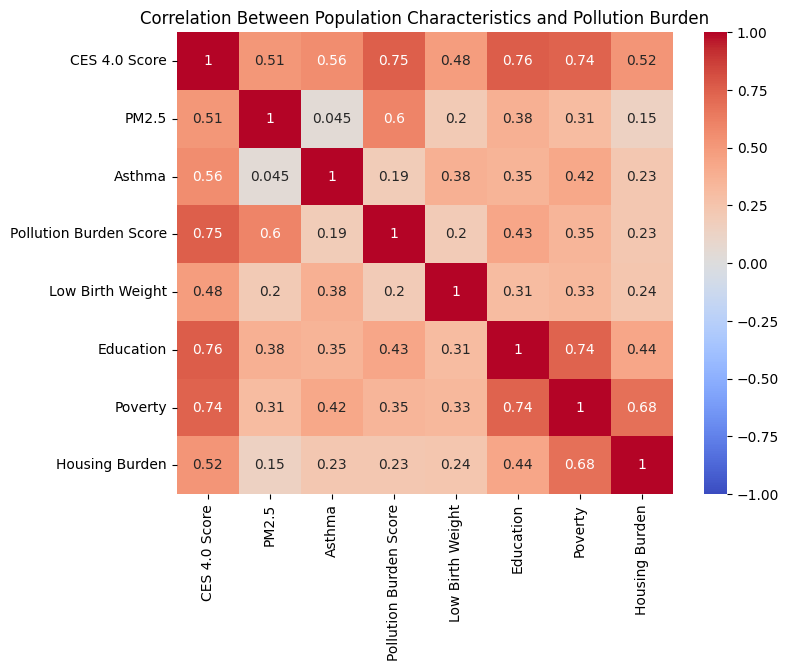

In [33]:
# Create a correlation matrix
corr_matrix = ces_subset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Population Characteristics and Pollution Burden')
plt.show()

**Question 3.3.2:** Which variables are strongly correlated with each other, in either the positive or negative direction? Why might these variables be strongly correlated with one another?

*YOUR ANSWER HERE...*

### 3.4 (Optional) Geopandas Section

CalEnviroScreen is also a mapping tool that allows us to visualize the socioeconomic disparities across California. We will be using a package called `geopandas` to facilitate this mapping. 

The following code cell reads in a shape file (.shp) and contains information that will allow us to map the data using geopandas. A shapefile is a popular geospatial vector data format that stores the geometry of the features in our data. They are common for handling geospatial data. Simply run the cell below to read in the shapefile associated with CalEnviroScreen.

In [34]:
# Run this code cell

file_path = 'calenviroscreen40shpf2021shp/CES4 Final Shapefile.shp'
gdf = gpd.read_file(file_path)
gdf.head()

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
0,6.083002e+09,93454,Santa Barbara,Santa Maria,4495,36.019653,69.162885,0.034190,10.566273,7.567724,...,12.5028,68.9210,20.8899,0.4004,0.2670,1.3126,6999.357689,2.847611e+06,8.2091,"POLYGON ((-39795.07 -341919.191, -38126.384 -3..."
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.07 -341919.191, -39803.632 -3..."
2,6.083002e+09,93454,Santa Barbara,Santa Maria,2398,31.213140,61.069087,0.034190,10.566273,7.548835,...,12.8857,65.7214,30.6088,0.9591,0.0000,2.1685,4970.985897,1.352329e+06,0.5421,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,93455,Santa Barbara,Orcutt,4496,6.639331,5.988401,0.036244,13.615432,7.660570,...,14.4128,22.9537,69.1948,0.9342,0.7117,2.5356,6558.956012,2.417717e+06,3.6699,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,93455,Santa Barbara,Orcutt,4008,14.022852,23.121533,0.036244,13.615432,7.663210,...,18.8872,33.4082,59.7804,0.6986,1.4721,1.3723,6570.368730,2.608422e+06,3.2685,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


We can call `.plot()` to map the data.

<Axes: >

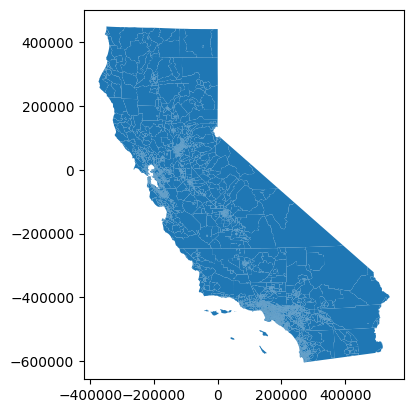

In [35]:
# map the data
gdf.plot()

**Question 3.4.1:** Like we did with the `ces` and `colleges` DataFrames, let's merge the gdf data with collegecodes_public. Following the format from before, merge the necessary datasets on zipcode. 

In [ ]:
# TODO: Fill in the ellipses

enviro_cc_shp = pd.merge(..., ..., how=..., left_on=..., right_on=...)
enviro_cc_shp.head()

We can use geopandas to visualize the spread of our metrics, like `Pollution Burden`. Run the following code cell below. The left plot displays the spread of pollution burden score across California and the right plot displays the spread of poverty across California.  

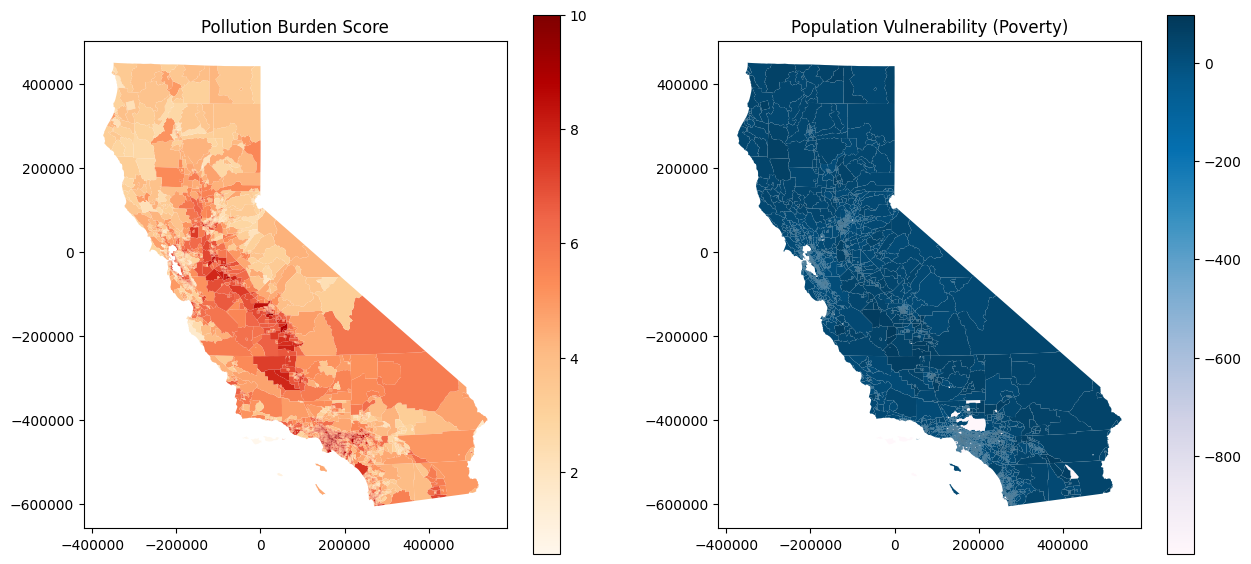

In [37]:
# Create a figure with subplots to compare pollution burden and population vulnerability
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot Pollution Burden on the left
gdf.plot(column='PolBurdSc', ax=ax[0], legend=True, cmap='OrRd')
ax[0].set_title('Pollution Burden Score')

# Plot Population Vulnerability on the right (example with 'Poverty' column)
gdf.plot(column='Poverty', ax=ax[1], legend=True, cmap='PuBu')
ax[1].set_title('Population Vulnerability (Poverty)')

plt.show()

**Question:** List an observation from each plot and how it relates to environmental justice.  

*YOUR ANSWER HERE...*

---

## 4. Data-driven Decision Making

Throughout this notebook, you gained valuable information about how to manipulate data to draw powerful analyses about socioeconomic disparaties across Los Angeles and California. Tools like CalEnviroScreen are essential for evaluating environmnetal justice because they help identify and prioritize communities that face higher environmnetal and health risks due to disproportionate effects of pollution. 

**Question 4.1:** Can you think of how an analysis of two other variables in the data not used in this notebook may be helpful for identifying marginalized communities? You may use the optional code cell as scratch work.

*YOUR ANSWER HERE...*

In [ ]:
# Optional code cell for scratch work

**Question 4.2:** In 3-4 sentences, how might access to CalEnviroScreen data help guide resource allocation and inform policymaking? How might different stakeholders (e.g., local governments, advocacy groups, researchers) use CalEnviroScreen data differently? Give examples of specific decisions or actions they might take.

*YOUR ANSWER HERE...*

**Question 4.3:** Finally, when working with data it is important to address the fundamental concept of **bias**. What potential biases might exist in the CalEnviroScreen data collection or analysis process? How could these biases impact the conclusions drawn from the data?

*YOUR ANSWER HERE...*

---

# Congratulations, you are finished with the notebook!

---